# Учебный проект 3_Исследование объявлений о продаже квартир

## Содержание

* [Описание проекта](#Описание)
* [Импорт библиотек Python и загрузка данных](#Импорт)
* [Предобработка данных](#Предобработка)
    * [Категоризация данных](#Категоризация)
* [Исследовательский анализ данных](#Исследование)
* [Вывод](#Вывод)

## Описание проекта <a class = 'anchor' id = 'Описание'></a>

На исследовании находятся данные сервиса Яндекс Недвижимость — `архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет`. 

**Задача**: `Определить рыночную стоимость объектов недвижимости`.

Путь решения: `Проведение исследовательского анализа данных и установка параметров, влияющих на цену объектов`. В дальнейшем это послужит основой для построения автоматизированной системы: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. **Первые вписаны пользователем**, **вторые — получены автоматически на основе картографических данных**.

Получены автоматически из геосервисов:
* расстояние до центра;
* расстояние до аэропорта;
* расстояние до других объектов;
* количество парков и водоёмов.

## Импорт библиотек Python и загрузка данных

Данный блок характеризуется следующими последовательными действиями:

1. Импорт библиотек Python:
    * для манипулирования данными;
    * для визуализации данных;
2. Загрузка данных в рабочую среду Jupyter Notebook. Инициализация переменной **data** для хранения загруженного датасета;
3. Вывод на экран параметров датасета:
    * вывод общей структуры набора данных - демонстрация первых 5 строк;
    * перечень столбцов набора данных;
    * общей информации о наборе данных;
4. Построение гистограмм распределения числовых показателей;
5. Формирование вывода по итогам данного этапа.

In [1]:
# импорт библиотек Python

# для манипулирования данными
import pandas as pd
import numpy as np

# для визуализации данных
import matplotlib.pyplot as plt

In [3]:
# инициализация переменной data - запись набора данных
data = pd.read_csv("~/Desktop/YandexPraktikum_projects/datasets/real_estate_data.csv", sep = '\t')

# вывод на экран структуры набора данных
display(data.head())

# вывод на экран перечня всех столбцов датасета
for column in data.columns.to_list():
    print(f'* {column}')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


* total_images
* last_price
* total_area
* first_day_exposition
* rooms
* ceiling_height
* floors_total
* living_area
* floor
* is_apartment
* studio
* open_plan
* kitchen_area
* balcony
* locality_name
* airports_nearest
* cityCenters_nearest
* parks_around3000
* parks_nearest
* ponds_around3000
* ponds_nearest
* days_exposition


**Описание данных**

* total_images - число фотографий квартиры в объявлении;
* last_price - цена на момент снятия с публикации;
* total_area - общая площадь квартиры, в квадратных метрах;
* first_day_exposition - дата публикации;
* rooms - число комнат;
* ceiling_height - высота потолков, в метрах;
* floors_total - всего этажей в доме;
* living_area - жилая площадь, в квадратных метрах;
* floor - этаж;
* is_apartment - апартаменты (булев тип данных);
* studio - квартира-студия (булев тип данных);
* open_plan - свободная планировка (булев тип данных);
* kitchen_area - площадь кухни, в квадратных метрах;
* balcony - число балконов;
* locality_name - название населенного пункта;
* airports_nearest - расстояние до ближайшего аэропорта, в метрах;
* cityCenters_nearest - расстояние до центра города, в метрах;
* parks_around3000 - число парков в радиусе 3 км;
* parks_nearest - расстояние до ближайшего парка, в метрах;
* ponds_around3000 - число водоемов в радиусе 3 км;
* ponds_nearest - расстояние до ближайшего водоема, в метрах;
* days_exposition - сколько дней было размещено объявление (от публикации до снятия);

In [4]:
# вывод на экран общей информации о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

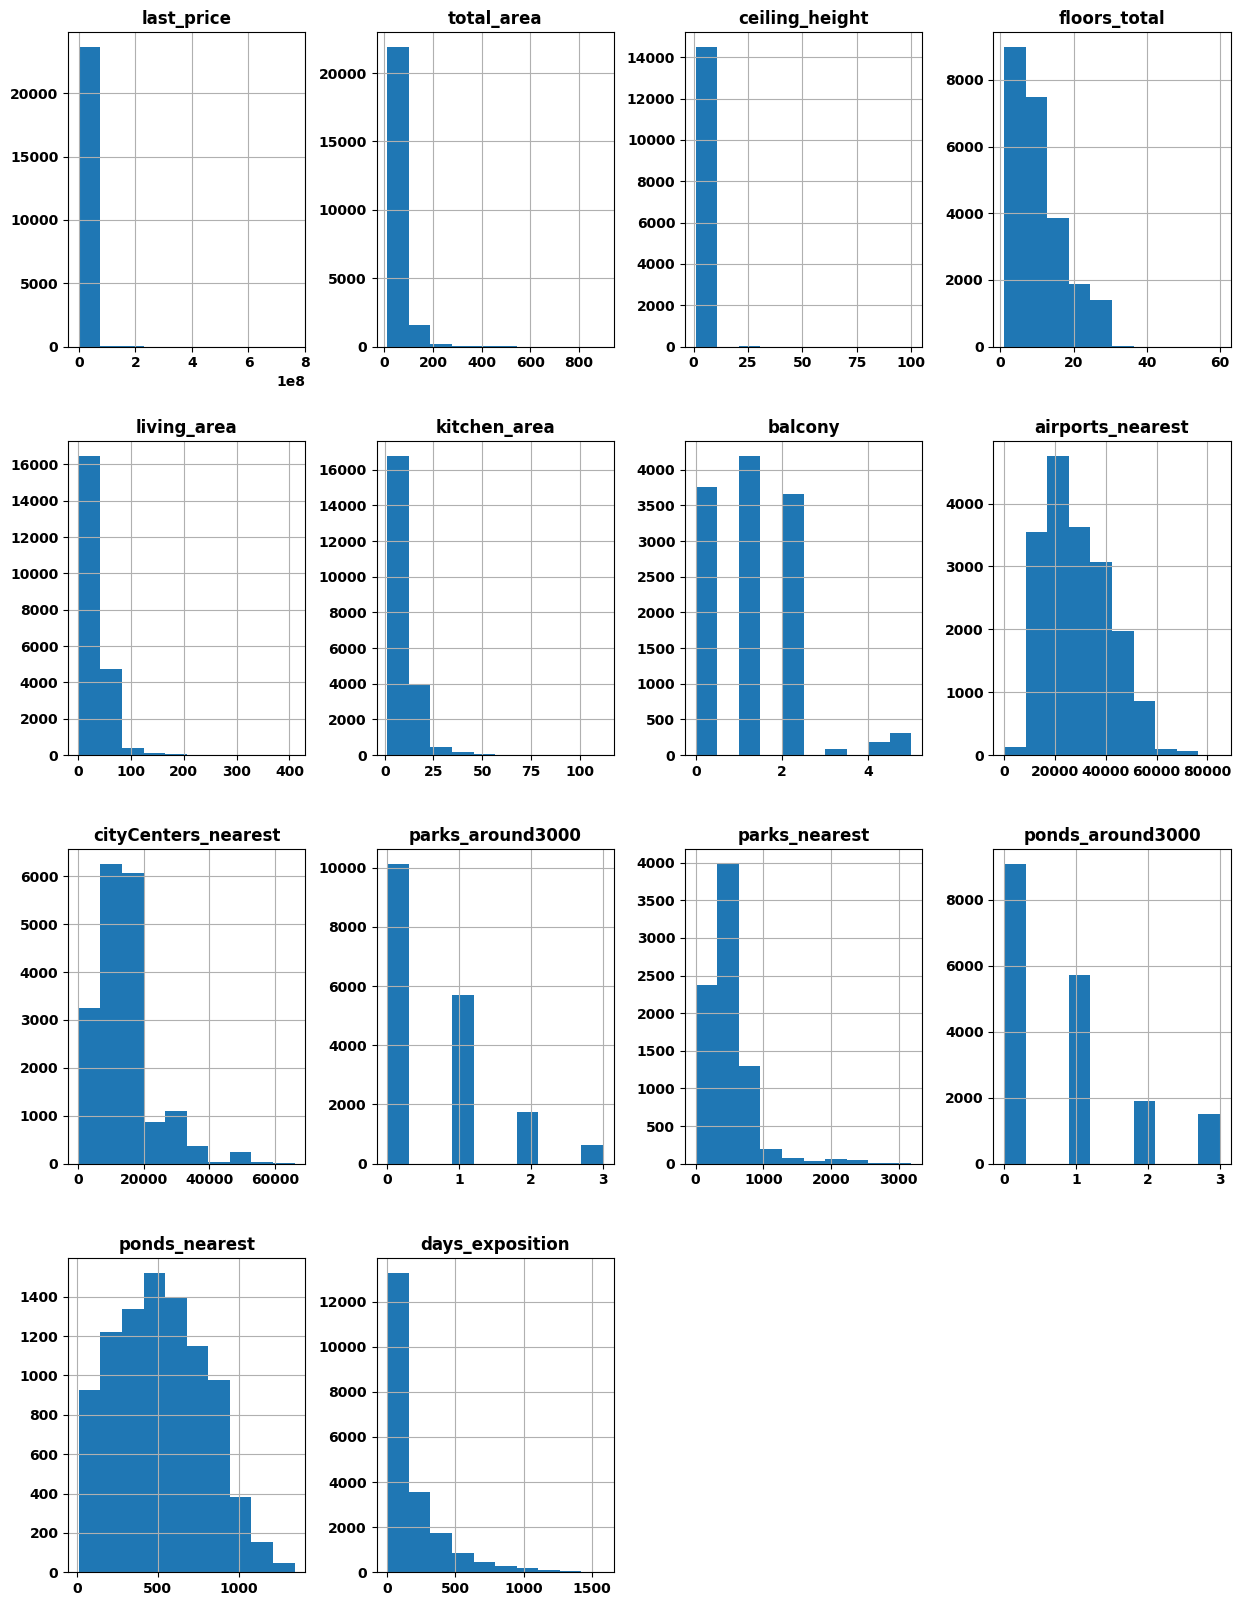

In [7]:
# построение диаграммы для всех числовых столбцов текущего набора данных
# plt.figure(figsize = (15, 20))
(data
 .select_dtypes(include='float64')
 .hist(figsize = (15, 20)))
plt.show()

**Вывод**:

1. Импортированы библиотеки Python:
    * для манипулирования данными - **pandas** и **numpy**;
    * для визуализации данных - **matplotlib.pyplot**;
2. Загружены данные в рабочую среду Jupyter Notebook. Инициализирована переменная **data** для хранения загруженного датасета;
3. Вывод на экран параметров датасета:
    * вывод общей структуры набора данных - демонстрация первых 5 строк;
    * переченя столбцов набора данных;
    * общей информации о наборе данных;
4. Набор данных характеризуется следующими показателями:
    * 23 699 - количество строк в датасете;
    * 22 - количество показателей, описывающих объект;
    * 2 столбца, имеющих явный булевый тип данных;
    * 14 столбцов, имеющих явный тип 'float';
    * 3 столбца - тип данных 'int';
    * 3 столбца - тип данных 'object';
    * 2 775 - самое минимальное количество непустых значений в столбце (признак 'is_apartment'); 
5. Построены гистограммы распределения числовых показателей. При первичном взгляде на полученные гистограммы заметны явные выбросы по признаку 'ceiling_height'. Детальное изучение гистограмм распределения будет выполнено на шаге предобработки данных;

## Предобработка данных <a class = 'anchor' id = 'Предобработка'></a>

Данный блок характеризуется следующими последовательными действиями:

1. Преобразование типов данных в столбцах таблицы;
2. Обработка пустых значений в данных;
3. Проверка датасета на дубликаты и очистка данных:
    * Явные дубликаты;
    * Неявные дубликаты;
4. Формирование вывода по итогам данного этапа.

### Обработка пустых значений в данных <a class = 'anchor' id = 'Предобработка_пустоты'></a>

In [13]:
# перевод признаков из типа 'float' к целочисленному типу
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

In [ ]:
# вывод на экран количества пропущенных значений по столбцам
print("Количество пустых значений в столбцах датасета")
(data
 .isna()
 .sum()
 .sort_values(ascending=False))

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [ ]:
# удаление из набора данных пустых значений в столбцах 'floors_total' и 'locality_name'
for column in ['locality_name', 'floors_total']:
    data = data.dropna(subset = column)

В наборе данных есть объявления, где хозяин жилья указывает количество парков поблизости - "parks_around3000". Так же в наборе данных есть объявления, у которых указано расстояние до ближайшего парка - "parks_nearest".

При этом, есть большое количество пропущенных значений в столбце "parks_nearest", которые потенциально можно заменить средним или медианным значением расстояния при условии, что для данных записей выполняется условие: **"Есть парки поблизости, но расстояние до ближайшего не известно"**.

Выведем количество записей и их долю от общего набора, если они соответствуют условию выше.

In [24]:
# вывод на экран количества объектов, для которых известно наличие парков, но не указано расстояние до ближайшего
print('Количество объектов, где известно наличие парка в радиусе 3 км, но не известно расстояние до ближайшего:', data[(data['parks_nearest'].isna() == True) & (data['parks_around3000'].isna() == False)].shape[0])
print('Доля объявлений от общего набора данных: {:.1%}'.format(data[(data['parks_nearest'].isna() == True) & (data['parks_around3000'].isna() == False)].shape[0] / data.shape[0]))

Количество объектов, где известно наличие парка в радиусе 3 км, но не известно расстояние до ближайшего: 10035
Доля объявлений от общего набора данных: 42.6%


К сожалению, доля записей с неизвестным расстоянием, но с расположенными поблизости `парками`, слишком велика, чтобы заполнить пустоты одинаковым значением - **это внесет искажения в исходные данные и не позволит провести объективный анализ.**

Рассмотрим ту же самую ситуацию с тем же условием, но для данных о водоемах.

In [25]:
# вывод на экран количества объектов, для которых известно наличие водоемов, но не указано расстояние до ближайшего
print('Количество объектов, где известно наличие водоема в радиусе 3 км, но не известно расстояние до ближайшего:', data[(data['ponds_nearest'].isna() == True) & (data['ponds_around3000'].isna() == False)].shape[0])
print('Доля объявлений от общего набора данных: {:.1%}'.format(data[(data['ponds_nearest'].isna() == True) & (data['ponds_around3000'].isna() == False)].shape[0] / data.shape[0]))

Количество объектов, где известно наличие водоема в радиусе 3 км, но не известно расстояние до ближайшего: 9029
Доля объявлений от общего набора данных: 38.3%


К сожалению, доля записей с неизвестным расстоянием, но с расположенными поблизости `водоемами`, слишком велика, чтобы заполнить пустоты одинаковым значением - **это внесет искажения в исходные данные и не позволит провести объективный анализ.**

In [26]:
# замена пропусков в столбце 'is_apartment' нулевым значением
data['is_apartment'] = data['is_apartment'].fillna(0)

Вполне вероятно, что пропуски в данном столбце обозначают, что дом/квартира не являются апартаментами, и домовладельцы решили не указывать это в явном виде.

Еще одним параметром, где можно вручную заполнить пустые значения, является `days_exposition`.
Предположение следующее: **Изучить данные на предмет последней даты публикации в столбце "first_day_exposition". Вполне возможно, что пустые значения в столбце "days_exposition" вызваны тем, что сами объявления были опубликованы в последнюю дату в наборе данных.**

In [29]:
# вычисление количества записей, где дата публикации совпадает с последней датой в наборе данных, а количество дней в 'days_exposition' неизвестно
print('Количество самых последних (с точки зрения даты) объявлений:',
      data[(data['days_exposition'].isna() == True) & (data['first_day_exposition'] == data['first_day_exposition'].max())].shape[0])
print('Общее количество пустых значений в столбце "days_exposition":', data['days_exposition'].isna().sum())

Количество самых последних (с точки зрения даты) объявлений: 20
Общее количество пустых значений в столбце "days_exposition": 3171


Таких записей всего 20 из общего набора.

Заполним пропущенные значения в столбце "days_exposition" для таких объявлений нулевым значением. Для остальных же - оставим пустые значения.

In [35]:
# заполнение пустот в столбце 'days_exposition'
data.loc[(data['days_exposition'].isna() == True) & (data['first_day_exposition'] == data['first_day_exposition'].max()), 'days_exposition'] = 0

In [41]:
# пользовательская функция исследования линейной взаимосвязи между двумя признаками набора данных
def corr_info (data: pd.DataFrame, first_feature: str, second_feature: str):
    data.plot(
        x = first_feature,
        y = second_feature,
        kind = 'scatter'
    )
    plt.show()

    print(f'Коэффициент корреляции Пирсона между {first_feature} и {second_feature}', data[first_feature].corr(data[second_feature]))

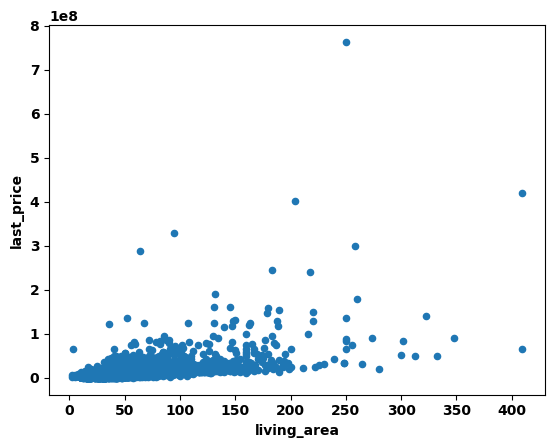

Коэффициент корреляции Пирсона между living_area и last_price 0.5663795524388774


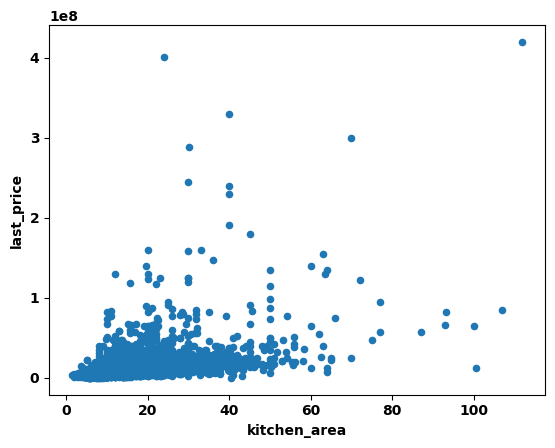

Коэффициент корреляции Пирсона между kitchen_area и last_price 0.5203617949655254


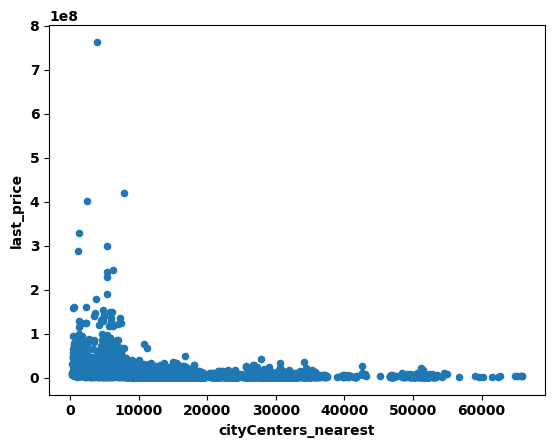

Коэффициент корреляции Пирсона между cityCenters_nearest и last_price -0.20635314264311044


In [45]:
for feature in ['living_area', 'kitchen_area', 'cityCenters_nearest']:
    corr_info(data, feature, 'last_price')

По итогам изучения визуализации данных и коэффициентов линейной связи двух переменных можно сделать следующий вывод:

1. Существует положительная связь между стоимостью недвижимости и жилой площадью - при увеличении жилой площади возрастает и итоговая цена недвижимости;
2. Существует положительная связь между стоимостью недвижимости и площадью кухни - при увеличении площади кухни возрастает и итоговая цена недвижимости;
3. Не замечено связи между удаленностью от центра и стоимостью недвижимости.

**Данные выводы можно использовать для дальнейшего заполнения пропусков**.

`Предлагается в зависимости от стоимости жилья сформировать группы недвижимости. В указанных группах жилье будет обладать примерно схожими признаками, исходя из этого можно будет пустые значения в параметрах 'living_area' и 'kitchen_area' заполнить выбранной мерой центральной тенденции (медианой или средним значением).`

In [47]:
# максимальное значение цены среди всех объявлений
data['last_price'].sort_values(ascending = False).head()

12971    763000000.0
19540    420000000.0
14706    401300000.0
1436     330000000.0
15651    300000000.0
Name: last_price, dtype: float64

In [ ]:
# пользовательская функция по присвоению групп для жилья в зависимости от стоимости
def price_category(last_price):
    fi

### Преобразование типов данных в столбцах таблицы <a class = 'anchor' id = 'Предобработка_типы'></a>